# Perform Classification

In [1]:
import numpy as np
%pylab inline
X_train_LSI = np.load('./data/X_train_LSI.npy')
X_test_LSI =np.load('./data/X_test_LSI.npy')
y_train_LSI = np.load('./data/y_train_LSI.npy')
y_test_LSI = np.load('./data/y_test_LSI.npy')

Populating the interactive namespace from numpy and matplotlib


In [3]:
X_all = np.concatenate((X_train_LSI, X_test_LSI), axis=0)
print X_all.shape

(7836, 50)


In [9]:
y_test_LSI

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
y_all = np.concatenate((y_train_LSI, y_test_LSI), axis=0)

[0 0 0 ..., 1 1 1]


In [2]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_LSI,y_train_LSI)
y_test_predicted = svm_model.predict(X_test_LSI)
y_score = svm_model.decision_function(X_test_LSI)
print 'accuracy: ', 1.0*sum(y_test_LSI==y_test_predicted) / len(y_test_LSI)

accuracy:  0.974603174603


In [9]:
# print y_test_LSI.shape
# def makeDecisionArray(y):
#     y_test = np.array([[0 for i in range(2)] for j in range(len(y_test_LSI))])
#     for i in range(len(y_test_LSI)):
#         y_test[i][y_test_LSI[i]]=1
#     return y_test
# y_test = makeDecisionArray(y_test_LSI)
# print y_test.shape

(3150,)
(3150, 2)


In [3]:
y_score.shape

(3150,)

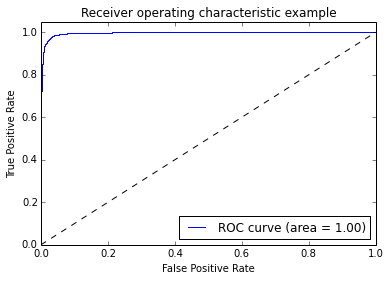

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(y_test_LSI, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_LSI.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Featch data and select features for multi-class classification

In [2]:
import numpy as np
###save X and y for multi-class classification
X_train_LSI_multi = np.load('./data/X_train_LSI_multi.npy')
X_test_LSI_multi = np.load('./data/X_test_LSI_multi.npy')
y_train_LSI_multi = np.load('./data/y_train_LSI_multi.npy')
y_test_LSI_multi = np.load('./data/y_test_LSI_multi.npy')

### Multi-Class SVM

In [3]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
#y_pred = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train_LSI_multi, y_train_LSI_multi).predict(X_test_LSI_multi)
y_pred = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_LSI_multi, y_train_LSI_multi).predict(X_test_LSI_multi)

print 'accuracy: ', 1.0*sum(y_pred==y_test_LSI_multi) / y_test_LSI_multi.shape[0]

accuracy:  0.883706070288


### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train_LSI_multi, y_train_LSI_multi).predict(X_test_LSI_multi)
print 'accuracy: ', 1.0*sum(y_pred==y_test_LSI_multi) / y_test_LSI_multi.shape[0]

accuracy:  0.670287539936


In [4]:
print y_pred
print y_test_LSI_multi

[2 1 1 ..., 0 2 3]
[2 1 1 ..., 1 2 3]


In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion = confusion_matrix(y_test_LSI_multi, y_pred)
precision = precision_score(y_test_LSI_multi, y_pred, average=None)  
recall = recall_score(y_test_LSI_multi, y_pred, average=None)
#recall = recall_score(y_test_LSI_multi, y_pred, average=None)
acc = accuracy_score(y_test_LSI_multi, y_pred)
print "confusion matrix: "
print confusion 
print "accuracy: ",acc
print "precision: ",precision
print "recall: ",recall

confusion matrix: 
[[316  50  26   0]
 [ 38 322  24   1]
 [ 20  14 355   1]
 [  6   1   1 390]]
accuracy:  0.883706070288
precision:  [ 0.83157895  0.83204134  0.87438424  0.99489796]
recall:  [ 0.80612245  0.83636364  0.91025641  0.9798995 ]
